In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [78]:
data=pd.read_csv('placement.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [79]:
data.shape

(215, 15)

In [80]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [81]:
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [82]:
data[data['salary'].isna()].status

3      Not Placed
5      Not Placed
6      Not Placed
9      Not Placed
12     Not Placed
          ...    
198    Not Placed
201    Not Placed
206    Not Placed
208    Not Placed
214    Not Placed
Name: status, Length: 67, dtype: object

In [83]:
#as a candidate is not placed so his salary is null 
#here we can replace null values by na

In [84]:
data['salary']=data['salary'].fillna(0)
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Assumption-1

### Salary and placement status be independent of gender

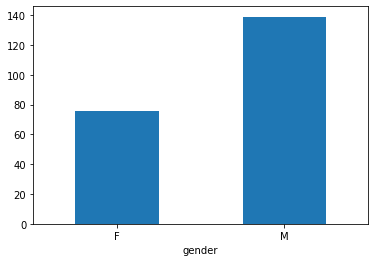

In [12]:
data.groupby('gender')['gender'].count().plot(kind='bar',rot=0)
plt.show()

In [13]:
dat=data[data.salary>0]

<AxesSubplot:xlabel='gender'>

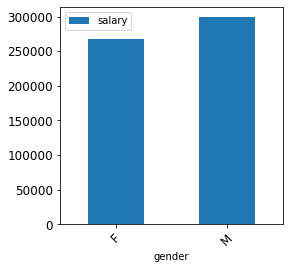

In [74]:
dat[['gender','salary']].groupby(['gender']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)

#### Two sample pop t-test
##### Ho: male & females both have equal average salary
##### H1: male & females have different average salary

In [67]:
#to calculate mean
dat[['gender','salary']].groupby(['gender']).mean()

,salary
gender,
F,267291.666667
M,298910.000000


In [68]:
#to calculate standard deviations
dat[['gender','salary']].groupby(['gender']).std()

,salary
gender,
F,75948.178955
M,99514.792058


In [71]:
#no of counts
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [72]:
#to calculate t_statistic
t_stat = (298910 - 167291)/ ((75948**2)/(76) + (99514**2)/(139))**0.5
#to calculate t_critical
t_cr = stats.t.isf(0.05,139+76-2)
t_cr,t_stat

(1.652038878026209, 10.850553242743825)

In [73]:
print("As t_statistic is greater than t_critical, we reject the null hypothesis")
print("Salary is dependent on Gender")

As t_statistic is greater than t_critical, we reject the null hypothesis
Salary is dependent on Gender


### Chi-square test for independence
ho: placement status is independent of gender of candidate

h1: placement status is dependent of gender of candidate

In [58]:
pd.crosstab(data.gender,data.status)

status,Not Placed,Placed
gender,,
F,28,48
M,39,100


In [65]:

F= [28,48]
M= [39,100]
F_Total= 28+48
M_Total= 39+100
NP_Total = 28+39
P_Total = 48+100
Total = NP_Total + P_Total

#Observed & Expected values
Observed = NP_Ob + P_Ob
Expected = [NP_Total*F_Total/Total,P_Total*F_Total/Total,NP_Total*M_Total/Total,P_Total*M_Total/Total]

#Calculating Chi_sq_statistic
chi_stat=0
for i in range(len(Observed)):
    a = (Expected[i]-Observed[i])**2/Expected[i]
    chi_stat+=a

#Calculating Chi_sq_critical
alpha = 0.05
n = 2
c = 2
chi_critical = stats.chi2.isf(alpha,df=(n-1)*(c-1))

print("Chi_statistic value: ", chi_stat)
print("Chi_critical value: ", chi_critical)

if chi_stat > chi_critical:
    print("Placement status is not independent of Gender")
else:
        print("Placement status is independent of Gender")

Chi_statistic value:  82.81579409409352
Chi_critical value:  3.8414588206941285
Placement status is not independent of Gender


# Assumption-2

## ssc_p, hsc_p may have no impact on salary

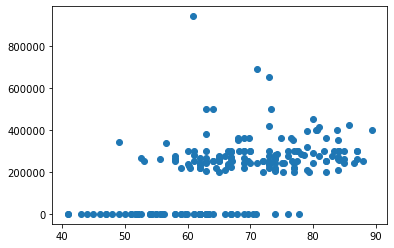

In [21]:
plt.scatter(data.ssc_p,data.salary)

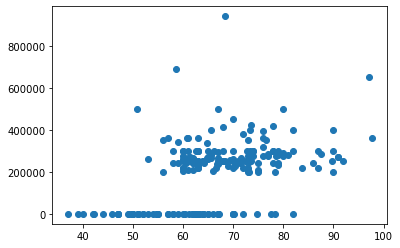

In [22]:
plt.scatter(data.hsc_p,data.salary)

# Assumption-3

## Degree_t, Degree_p may not have much effect on placements

In [23]:
data['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [24]:
pd.crosstab(data.status,data.degree_t)

degree_t,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,43,6,18
Placed,102,5,41


In [25]:
dat[['degree_t','salary']].groupby(['degree_t']).mean()

,salary
degree_t,
Comm&Mgmt,278627.450980
Others,280400.000000
Sci&Tech,314609.756098


In [30]:
dat1=dat[dat.degree_t=='Sci&Tech']
dat2=dat[dat.degree_t!='Sci&Tech']

In [31]:
num=dat1['salary'].mean()-dat2['salary'].mean()
den=np.var(dat1['salary'])/len(dat1)+np.var(dat2['salary'])/len(dat2)
t_stat=num/den**0.5

In [32]:
t_stat,stats.t.isf(0.05,df=213)

(2.0322380676543066, 1.652038878026209)

# Assumption-4

## Workex will have impact on salary

<AxesSubplot:xlabel='workex'>

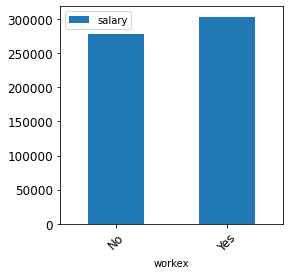

In [47]:
dat1[['salary','workex']].groupby(['workex']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)

In [38]:
dat[['workex','salary']].groupby(['workex']).mean(),dat[['workex','salary']].groupby(['workex']).std()

(               salary
 workex               
 No      277523.809524
 Yes     303265.625000,
                salary
 workex               
 No       61643.255856
 Yes     122440.817215)

In [39]:
dat.workex.value_counts()

No     84
Yes    64
Name: workex, dtype: int64

In [46]:
t_stat = (-277523 + 303265)/ ((61643**2)/(84) + (122440**2)/(64))**0.5

t_cr = stats.t.isf(0.025,84+64-2)
t_cr,t_stat

(1.9763456545827007, 1.5398107537547994)

In [85]:
print("Here t_stat is less than t_critical & hence i failed to reject the null hypothesis")
print("Salary is independent of Workex")

Here t_stat is less than t_critical & hence i failed to reject the null hypothesis
Salary is independent of Workex


# Assumption-5

## Etest_p will have impact placements status as well as salary

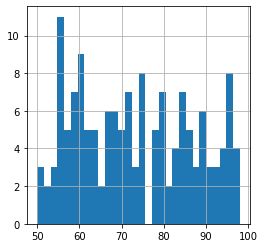

In [58]:
# Firstly we will study the distribution of etest_p
dat['etest_p'].hist(bins = 30, figsize= (4, 4))
plt.show()

<AxesSubplot:xlabel='status'>

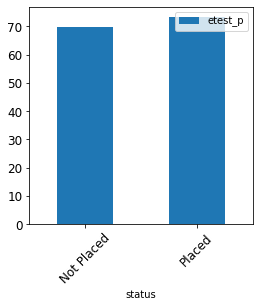

In [55]:
# comparing means of placed and non placed candidates to study 
#if there is impact of etest marks on placement status 
data[['etest_p','status']].groupby(['status']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)

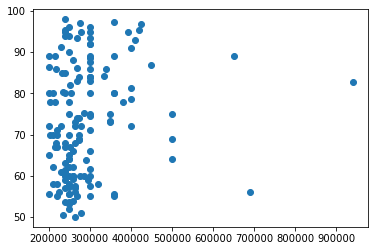

In [57]:
plt.scatter(dat.salary,dat.etest_p) # ploting the scatter plot between 2 numeric variables to study the realtionship between them

# Assumption-6

## Specialisation will have impact on placements and salary

<AxesSubplot:xlabel='specialisation'>

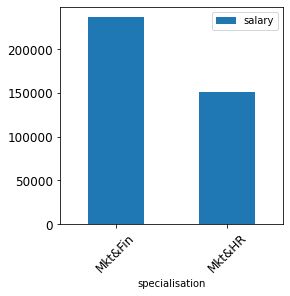

In [87]:
data[['salary','specialisation']].groupby(['specialisation']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)

In [86]:
pd.crosstab(data.status,data.specialisation)

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,25,42
Placed,95,53


##### Chi square test of independence

In [89]:
#From abpove visualization
#Ho: Placement status is independent of MBA specialization
#H1:Placement status is not independent of MBA specialization


NP_Ob= [25,42]
P_Ob= [95,53]
NP_Total= 25+42
P_Total = 95+53
MF_Total = 25+95
MHR_Total = 42+53
Total = NP_Total + P_Total
NP_Ex = [MF_Total*NP_Total/Total,MHR_Total*NP_Total/Total]
P_Ex = [MF_Total*P_Total/Total,MHR_Total*P_Total/Total]

#Observed & Expected values
Observed = NP_Ob + P_Ob
Expected = NP_Ex + P_Ex

#Calculating Chi_sq_statistic
chi_stat=0
for i in range(len(Observed)):
    a = (Expected[i]-Observed[i])**2/Expected[i]
    chi_stat+=a

#Calculating Chi_sq_critical
alpha = 0.05
n = 2
c = 2
chi_critical = stats.chi2.isf(alpha,df=(n-1)*(c-1))

print("Chi_statistic value: ", chi_stat)
print("Chi_critical value: ", chi_critical)

if chi_stat > chi_critical:
    print("Placement status is dependent of MBA specialization")
else:
        print("Placement status is independent of MBA specialization")

Chi_statistic value:  13.508014470676486
Chi_critical value:  3.8414588206941285
Placement status is dependent of MBA specialization


In [57]:
#This shows that MBA Specialization impact the placement status.

# Assumption-7

## Mba_p will have impact on placements and salary

<AxesSubplot:xlabel='status'>

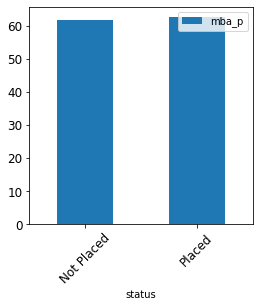

In [74]:
data[['status','mba_p']].groupby(['status']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)

In [78]:
dat3=data[data.status=='Placed']
dat4=data[data.status!='Placed']
num=dat3['mba_p'].mean()-dat4['mba_p'].mean()
den=np.var(dat3['mba_p'])/len(dat3)+np.var(dat4['mba_p'])/len(dat4)
t_stat=num/den**0.5

In [79]:
t_stat

1.1462551656990212

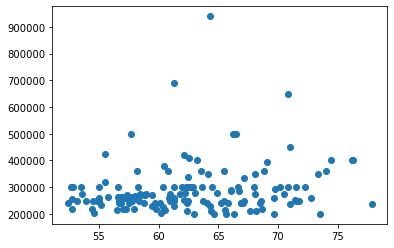

In [80]:
plt.scatter(dat.mba_p,dat.salary)

In [88]:
#not much relation is observed in mba_p and salary

## Conclusion:

### Based on the various hypothesis tests we can conclude that salary of a student/candidate depends upon:
- Gender
- MBA Specialization (current course)
- employability test %
- It seems some 50% cutoff in hsc & ssc is there to be eligible for placemnets

### & Salary doesn't depend upon:
- SSC & HSC details
- Work wxperience of a candidate
- MBA marks
